In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random as random
random.seed(0)
# create a KNN model for the merged_filtered_data_crc.csv file
# Load the dataset

data = pd.read_csv("merged.csv")
data


,Unnamed: 0.1,Unnamed: 0,TBL,msi_status,fraction_genome_altered,aneuploidy_score,TMB,TP53,KRAS,BRAF,...,RBKS,LOC100287015,KDM8,DUSP28,ZBTB49,ZNF79,FAM111A-DT,TTLL11,GPR89A,PSPN
0,0,TCGA-3L-AA1B-01A,19,MSS,0.114119,6,118,WT,WT,SNV,...,146.0,226.0,225.0,248.0,449.0,220.0,265.0,150.0,173.0,155.0
1,1,TCGA-4N-A93T-01A,38,MSS,0.311631,12,81,SNV,SNV,WT,...,196.0,166.0,135.0,309.0,260.0,203.0,286.0,176.0,183.0,287.0
2,2,TCGA-5M-AAT4-01A,87,MSS,0.422921,13,159,SNV,SNV,WT,...,196.0,246.0,160.0,267.0,268.0,212.0,171.0,190.0,231.0,225.0
3,3,TCGA-5M-AAT5-01A,28,MSI-L,0.357734,12,72,SNV,WT,WT,...,138.0,147.0,157.0,170.0,177.0,121.0,222.0,124.0,190.0,247.0
4,4,TCGA-5M-AAT6-01A,3,MSI-H,0.049432,2,1828,WT,SNV,WT,...,129.0,161.0,150.0,106.0,170.0,147.0,145.0,118.0,135.0,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,TCGA-QL-A97D-01A,104,MSS,0.309643,9,209,SNV,SNV,WT,...,120.0,239.0,124.0,146.0,194.0,170.0,190.0,206.0,253.0,184.0
431,431,TCGA-RU-A8FL-01A,105,MSS,0.270808,10,115,SNV,WT,WT,...,246.0,184.0,163.0,308.0,408.0,159.0,125.0,100.0,320.0,107.0
432,432,TCGA-SS-A7HO-01A,82,MSS,0.408573,15,143,SNV,SNV,WT,...,152.0,605.0,425.0,312.0,268.0,164.0,306.0,265.0,182.0,156.0
433,433,TCGA-T9-A92H-01A,115,MSS,0.178141,6,150,SNV,WT,WT,...,343.0,616.0,428.0,225.0,177.0,145.0,264.0,213.0,182.0,186.0


In [2]:
def KNN(target_variable='msi_status', test_size=0.2, random_state=42, neighbors=5, do_pca=False, plot_boundary=False):
    y = data[target_variable]
    X = data.drop(target_variable, axis=1)
    le = LabelEncoder()
    # Fit and transform the features
    X = X.apply(le.fit_transform)

    # Apply PCA
    if do_pca != False:
        print("Doing PCA = " + str(do_pca))
        pca = PCA(n_components=do_pca)
        X = pca.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create a KNN model
    knn = KNeighborsClassifier(n_neighbors=neighbors)

    # Train the model
    knn.fit(X_train, Y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(Y_test, y_pred)
    print("Accuracy:", accuracy)
    
    return accuracy

Accuracy for 3 neighbors:
Doing PCA = 2
Accuracy: 0.5517241379310345


Accuracy for 5 neighbors:
Doing PCA = 2
Accuracy: 0.6091954022988506


Accuracy for 7 neighbors:
Doing PCA = 2
Accuracy: 0.632183908045977


Accuracy for 9 neighbors:
Doing PCA = 2
Accuracy: 0.6551724137931034


Accuracy for 11 neighbors:
Doing PCA = 2
Accuracy: 0.6551724137931034


Accuracy for 13 neighbors:
Doing PCA = 2
Accuracy: 0.6551724137931034


Accuracy for 15 neighbors:
Doing PCA = 2
Accuracy: 0.6666666666666666


Accuracy for 17 neighbors:
Doing PCA = 2
Accuracy: 0.6781609195402298


Accuracy for 19 neighbors:
Doing PCA = 2
Accuracy: 0.6896551724137931


Accuracy for 21 neighbors:
Doing PCA = 2
Accuracy: 0.6781609195402298


Accuracy for 23 neighbors:
Doing PCA = 2
Accuracy: 0.6781609195402298


Accuracy for 25 neighbors:
Doing PCA = 2
Accuracy: 0.6896551724137931


Accuracy for 27 neighbors:
Doing PCA = 2
Accuracy: 0.6896551724137931


Accuracy for 29 neighbors:
Doing PCA = 2
Accuracy: 0.6896551724137931

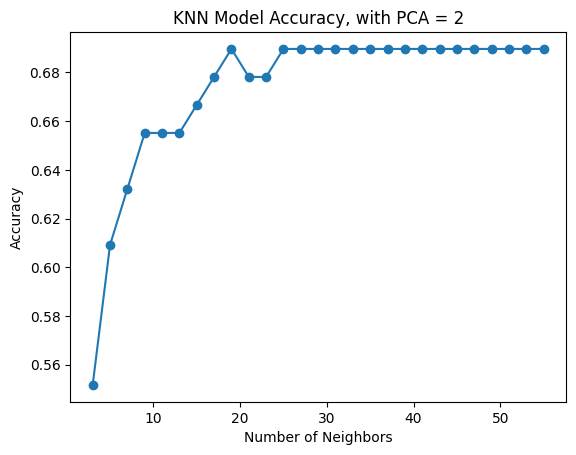

Accuracy for 3 neighbors:
Doing PCA = 7
Accuracy: 0.6666666666666666


Accuracy for 5 neighbors:
Doing PCA = 7
Accuracy: 0.7126436781609196


Accuracy for 7 neighbors:
Doing PCA = 7
Accuracy: 0.7241379310344828


Accuracy for 9 neighbors:
Doing PCA = 7
Accuracy: 0.7241379310344828


Accuracy for 11 neighbors:
Doing PCA = 7
Accuracy: 0.735632183908046


Accuracy for 13 neighbors:
Doing PCA = 7
Accuracy: 0.735632183908046


Accuracy for 15 neighbors:
Doing PCA = 7
Accuracy: 0.735632183908046


Accuracy for 17 neighbors:
Doing PCA = 7
Accuracy: 0.7241379310344828


Accuracy for 19 neighbors:
Doing PCA = 7
Accuracy: 0.7241379310344828


Accuracy for 21 neighbors:
Doing PCA = 7
Accuracy: 0.7126436781609196


Accuracy for 23 neighbors:
Doing PCA = 7
Accuracy: 0.7011494252873564


Accuracy for 25 neighbors:
Doing PCA = 7
Accuracy: 0.7126436781609196


Accuracy for 27 neighbors:
Doing PCA = 7
Accuracy: 0.735632183908046


Accuracy for 29 neighbors:
Doing PCA = 7
Accuracy: 0.7471264367816092




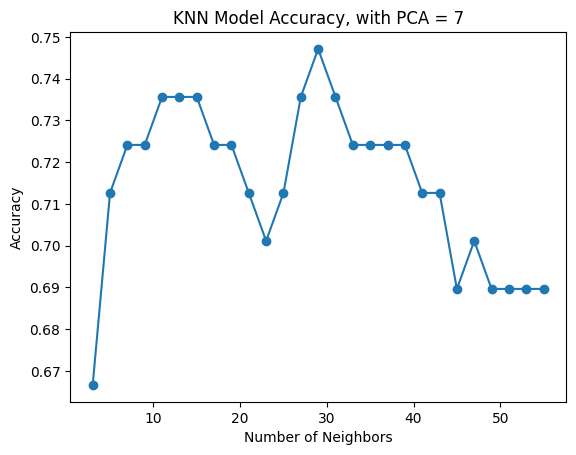

Accuracy for 3 neighbors:
Doing PCA = 12
Accuracy: 0.6896551724137931


Accuracy for 5 neighbors:
Doing PCA = 12
Accuracy: 0.6896551724137931


Accuracy for 7 neighbors:
Doing PCA = 12
Accuracy: 0.6896551724137931


Accuracy for 9 neighbors:
Doing PCA = 12
Accuracy: 0.6896551724137931


Accuracy for 11 neighbors:
Doing PCA = 12
Accuracy: 0.7241379310344828


Accuracy for 13 neighbors:
Doing PCA = 12
Accuracy: 0.735632183908046


Accuracy for 15 neighbors:
Doing PCA = 12
Accuracy: 0.735632183908046


Accuracy for 17 neighbors:
Doing PCA = 12
Accuracy: 0.735632183908046


Accuracy for 19 neighbors:
Doing PCA = 12
Accuracy: 0.7126436781609196


Accuracy for 21 neighbors:
Doing PCA = 12
Accuracy: 0.7126436781609196


Accuracy for 23 neighbors:
Doing PCA = 12
Accuracy: 0.7241379310344828


Accuracy for 25 neighbors:
Doing PCA = 12
Accuracy: 0.735632183908046


Accuracy for 27 neighbors:
Doing PCA = 12
Accuracy: 0.735632183908046


Accuracy for 29 neighbors:
Doing PCA = 12
Accuracy: 0.747126

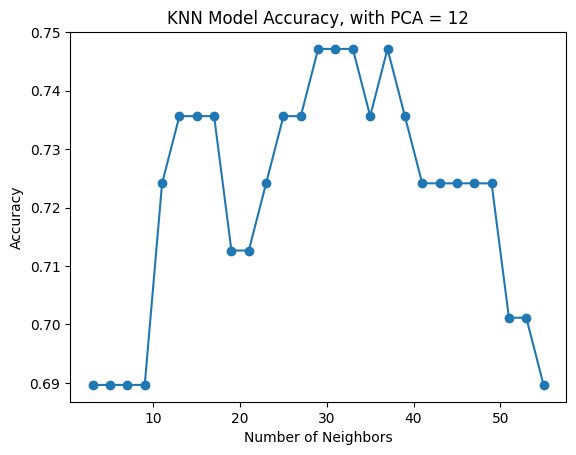

In [3]:
number_of_neighbors = 55
for j in range(2, 16, 5):
    accuracy_scores = []
    neighbour_values = []
    for i in range(3, number_of_neighbors+1, 2):
        print(f"Accuracy for {i} neighbors:")
        accuracy = KNN(neighbors=i, do_pca = j)
        print("\n")
        accuracy_scores.append(accuracy)
        neighbour_values.append(i)


    print(accuracy_scores)
    plt.plot(neighbour_values, accuracy_scores, marker='o')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.title('KNN Model Accuracy, with PCA = ' + str(j))
    plt.show()

Accuracy: 0.7126436781609196
Accuracy for 3 neighbors:0.7126436781609196

Accuracy: 0.7126436781609196
Accuracy for 5 neighbors:0.7126436781609196

Accuracy: 0.7126436781609196
Accuracy for 7 neighbors:0.7126436781609196

Accuracy: 0.7241379310344828
Accuracy for 9 neighbors:0.7241379310344828

Accuracy: 0.735632183908046
Accuracy for 11 neighbors:0.735632183908046

Accuracy: 0.7241379310344828
Accuracy for 13 neighbors:0.7241379310344828

Accuracy: 0.735632183908046
Accuracy for 15 neighbors:0.735632183908046

Accuracy: 0.7471264367816092
Accuracy for 17 neighbors:0.7471264367816092

Accuracy: 0.7241379310344828
Accuracy for 19 neighbors:0.7241379310344828

Accuracy: 0.735632183908046
Accuracy for 21 neighbors:0.735632183908046

Accuracy: 0.7471264367816092
Accuracy for 23 neighbors:0.7471264367816092

Accuracy: 0.735632183908046
Accuracy for 25 neighbors:0.735632183908046

Accuracy: 0.7471264367816092
Accuracy for 27 neighbors:0.7471264367816092

Accuracy: 0.735632183908046
Accuracy 

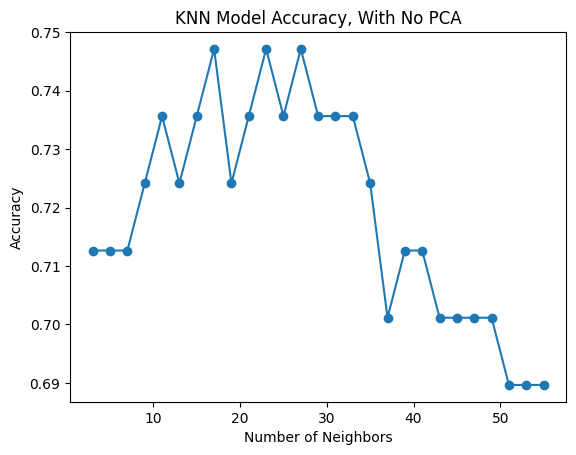

In [5]:
number_of_neighbors = 55
accuracy_scores = []
neighbour_values = []
for i in range(3, number_of_neighbors+1, 2):
    accuracy = KNN(neighbors=i)
    print(f"Accuracy for {i} neighbors:" + str(accuracy) + "\n")
    accuracy_scores.append(accuracy)
    neighbour_values.append(i)

plt.plot(neighbour_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy, With No PCA')
plt.show()

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Accuracy for 3 neighbors:
Accuracy: 0.6363636363636364


Accuracy for 5 neighbors:
Accuracy: 0.6136363636363636


Accuracy for 7 neighbors:
Accuracy: 0.5681818181818182


Accuracy for 9 neighbors:
Accuracy: 0.5909090909090909


Accuracy for 11 neighbors:
Accuracy: 0.6136363636363636


Accuracy for 13 neighbors:
Accuracy: 0.5909090909090909


Accuracy for 15 neighbors:
Accuracy: 0.5909090909090909


Accuracy for 17 neighbors:
Accuracy: 0.6136363636363636


Accuracy for 19 neighbors:
Accuracy: 0.6136363636363636


Accuracy for 21 neighbors:
Accuracy: 0.6363636363636364


Accuracy for 23 neighbors:
Accuracy: 0.6590909090909091


Accuracy for 25 neighbors:
Accuracy: 0.6590909090909091


Accuracy for 27 neighbors:
Accuracy: 0.6590909090909091


Accuracy for 29 neighbors:
Accuracy: 0.6590909090909091


Accuracy for 31 neighbors:
Accuracy: 0.6590909090909091


Accuracy for 33 neighbors:
Accuracy: 0.6590909090909091


Accuracy for 35 neighbors:
Acc

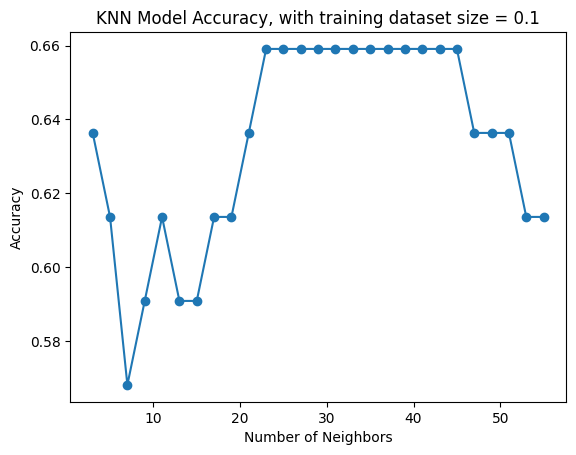

Accuracy for 3 neighbors:
Accuracy: 0.7126436781609196


Accuracy for 5 neighbors:
Accuracy: 0.7126436781609196


Accuracy for 7 neighbors:
Accuracy: 0.7126436781609196


Accuracy for 9 neighbors:
Accuracy: 0.7241379310344828


Accuracy for 11 neighbors:
Accuracy: 0.735632183908046


Accuracy for 13 neighbors:
Accuracy: 0.7241379310344828


Accuracy for 15 neighbors:
Accuracy: 0.735632183908046


Accuracy for 17 neighbors:
Accuracy: 0.7471264367816092


Accuracy for 19 neighbors:
Accuracy: 0.7241379310344828


Accuracy for 21 neighbors:
Accuracy: 0.735632183908046


Accuracy for 23 neighbors:
Accuracy: 0.7471264367816092


Accuracy for 25 neighbors:
Accuracy: 0.735632183908046


Accuracy for 27 neighbors:
Accuracy: 0.7471264367816092


Accuracy for 29 neighbors:
Accuracy: 0.735632183908046


Accuracy for 31 neighbors:
Accuracy: 0.735632183908046


Accuracy for 33 neighbors:
Accuracy: 0.735632183908046


Accuracy for 35 neighbors:
Accuracy: 0.7241379310344828


Accuracy for 37 neighbors

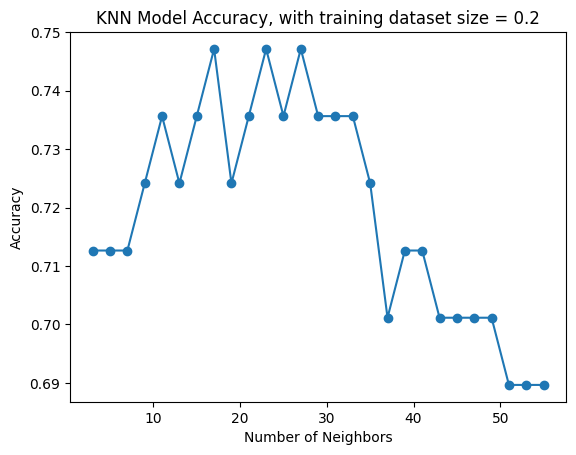

Accuracy for 3 neighbors:
Accuracy: 0.7557251908396947


Accuracy for 5 neighbors:
Accuracy: 0.7175572519083969


Accuracy for 7 neighbors:
Accuracy: 0.7175572519083969


Accuracy for 9 neighbors:
Accuracy: 0.7175572519083969


Accuracy for 11 neighbors:
Accuracy: 0.7251908396946565


Accuracy for 13 neighbors:
Accuracy: 0.7251908396946565


Accuracy for 15 neighbors:
Accuracy: 0.7251908396946565


Accuracy for 17 neighbors:
Accuracy: 0.7251908396946565


Accuracy for 19 neighbors:
Accuracy: 0.7099236641221374


Accuracy for 21 neighbors:
Accuracy: 0.7175572519083969


Accuracy for 23 neighbors:
Accuracy: 0.7175572519083969


Accuracy for 25 neighbors:
Accuracy: 0.7022900763358778


Accuracy for 27 neighbors:
Accuracy: 0.7099236641221374


Accuracy for 29 neighbors:
Accuracy: 0.7022900763358778


Accuracy for 31 neighbors:
Accuracy: 0.7022900763358778


Accuracy for 33 neighbors:
Accuracy: 0.6870229007633588


Accuracy for 35 neighbors:
Accuracy: 0.6946564885496184


Accuracy for 37 ne

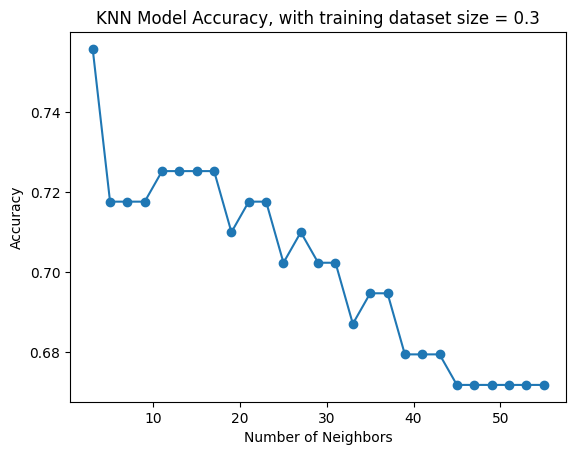

Accuracy for 3 neighbors:
Accuracy: 0.7241379310344828


Accuracy for 5 neighbors:
Accuracy: 0.7298850574712644


Accuracy for 7 neighbors:
Accuracy: 0.7413793103448276


Accuracy for 9 neighbors:
Accuracy: 0.7413793103448276


Accuracy for 11 neighbors:
Accuracy: 0.7471264367816092


Accuracy for 13 neighbors:
Accuracy: 0.735632183908046


Accuracy for 15 neighbors:
Accuracy: 0.735632183908046


Accuracy for 17 neighbors:
Accuracy: 0.7298850574712644


Accuracy for 19 neighbors:
Accuracy: 0.7241379310344828


Accuracy for 21 neighbors:
Accuracy: 0.7183908045977011


Accuracy for 23 neighbors:
Accuracy: 0.7068965517241379


Accuracy for 25 neighbors:
Accuracy: 0.7068965517241379


Accuracy for 27 neighbors:
Accuracy: 0.7126436781609196


Accuracy for 29 neighbors:
Accuracy: 0.6954022988505747


Accuracy for 31 neighbors:
Accuracy: 0.7011494252873564


Accuracy for 33 neighbors:
Accuracy: 0.7011494252873564


Accuracy for 35 neighbors:
Accuracy: 0.6896551724137931


Accuracy for 37 neig

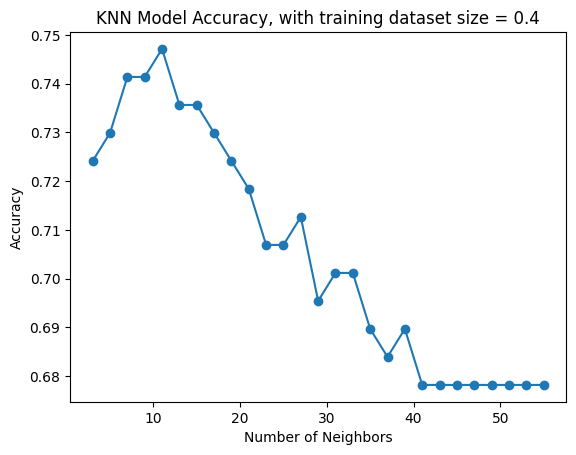

Accuracy for 3 neighbors:
Accuracy: 0.7155963302752294


Accuracy for 5 neighbors:
Accuracy: 0.7064220183486238


Accuracy for 7 neighbors:
Accuracy: 0.7201834862385321


Accuracy for 9 neighbors:
Accuracy: 0.7110091743119266


Accuracy for 11 neighbors:
Accuracy: 0.7064220183486238


Accuracy for 13 neighbors:
Accuracy: 0.7110091743119266


Accuracy for 15 neighbors:
Accuracy: 0.6972477064220184


Accuracy for 17 neighbors:
Accuracy: 0.6880733944954128


Accuracy for 19 neighbors:
Accuracy: 0.6788990825688074


Accuracy for 21 neighbors:
Accuracy: 0.6743119266055045


Accuracy for 23 neighbors:
Accuracy: 0.6697247706422018


Accuracy for 25 neighbors:
Accuracy: 0.6559633027522935


Accuracy for 27 neighbors:
Accuracy: 0.6513761467889908


Accuracy for 29 neighbors:
Accuracy: 0.6513761467889908


Accuracy for 31 neighbors:
Accuracy: 0.6513761467889908


Accuracy for 33 neighbors:
Accuracy: 0.6513761467889908


Accuracy for 35 neighbors:
Accuracy: 0.6513761467889908


Accuracy for 37 ne

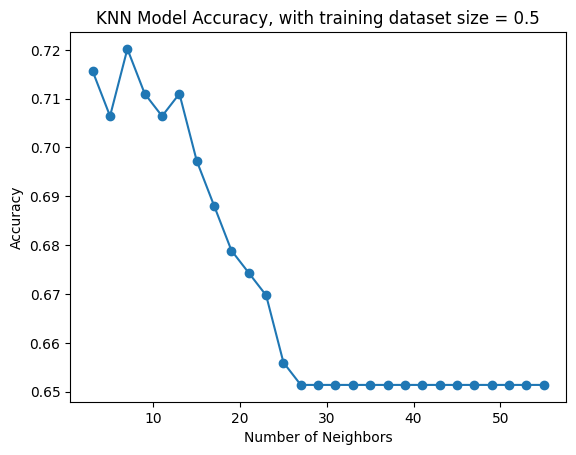

Accuracy for 3 neighbors:
Accuracy: 0.7088122605363985


Accuracy for 5 neighbors:
Accuracy: 0.7088122605363985


Accuracy for 7 neighbors:
Accuracy: 0.7088122605363985


Accuracy for 9 neighbors:
Accuracy: 0.6973180076628352


Accuracy for 11 neighbors:
Accuracy: 0.6934865900383141


Accuracy for 13 neighbors:
Accuracy: 0.685823754789272


Accuracy for 15 neighbors:
Accuracy: 0.6781609195402298


Accuracy for 17 neighbors:
Accuracy: 0.6704980842911877


Accuracy for 19 neighbors:
Accuracy: 0.6704980842911877


Accuracy for 21 neighbors:
Accuracy: 0.6666666666666666


Accuracy for 23 neighbors:
Accuracy: 0.6628352490421456


Accuracy for 25 neighbors:
Accuracy: 0.6628352490421456


Accuracy for 27 neighbors:
Accuracy: 0.6628352490421456


Accuracy for 29 neighbors:
Accuracy: 0.6628352490421456


Accuracy for 31 neighbors:
Accuracy: 0.6628352490421456


Accuracy for 33 neighbors:
Accuracy: 0.6628352490421456


Accuracy for 35 neighbors:
Accuracy: 0.6628352490421456


Accuracy for 37 nei

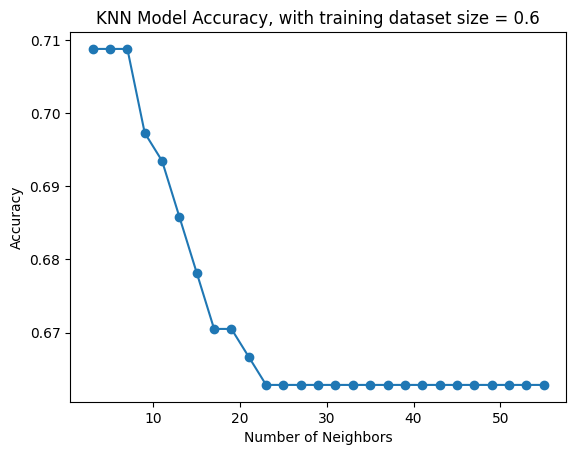

Accuracy for 3 neighbors:
Accuracy: 0.7049180327868853


Accuracy for 5 neighbors:
Accuracy: 0.7147540983606557


Accuracy for 7 neighbors:
Accuracy: 0.7114754098360656


Accuracy for 9 neighbors:
Accuracy: 0.6950819672131148


Accuracy for 11 neighbors:
Accuracy: 0.6819672131147541


Accuracy for 13 neighbors:
Accuracy: 0.6754098360655738


Accuracy for 15 neighbors:
Accuracy: 0.6655737704918033


Accuracy for 17 neighbors:
Accuracy: 0.6622950819672131


Accuracy for 19 neighbors:
Accuracy: 0.6622950819672131


Accuracy for 21 neighbors:
Accuracy: 0.6622950819672131


Accuracy for 23 neighbors:
Accuracy: 0.6622950819672131


Accuracy for 25 neighbors:
Accuracy: 0.6622950819672131


Accuracy for 27 neighbors:
Accuracy: 0.6622950819672131


Accuracy for 29 neighbors:
Accuracy: 0.6622950819672131


Accuracy for 31 neighbors:
Accuracy: 0.6622950819672131


Accuracy for 33 neighbors:
Accuracy: 0.6622950819672131


Accuracy for 35 neighbors:
Accuracy: 0.6622950819672131


Accuracy for 37 ne

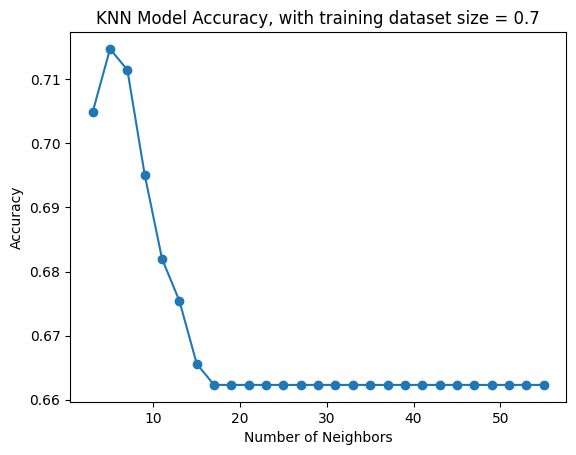

Accuracy for 3 neighbors:
Accuracy: 0.6954022988505747


Accuracy for 5 neighbors:
Accuracy: 0.6925287356321839


Accuracy for 7 neighbors:
Accuracy: 0.6954022988505747


Accuracy for 9 neighbors:
Accuracy: 0.6810344827586207


Accuracy for 11 neighbors:
Accuracy: 0.6781609195402298


Accuracy for 13 neighbors:
Accuracy: 0.6724137931034483


Accuracy for 15 neighbors:
Accuracy: 0.6695402298850575


Accuracy for 17 neighbors:
Accuracy: 0.6695402298850575


Accuracy for 19 neighbors:
Accuracy: 0.6695402298850575


Accuracy for 21 neighbors:
Accuracy: 0.6695402298850575


Accuracy for 23 neighbors:
Accuracy: 0.6695402298850575


Accuracy for 25 neighbors:
Accuracy: 0.6695402298850575


Accuracy for 27 neighbors:
Accuracy: 0.6695402298850575


Accuracy for 29 neighbors:
Accuracy: 0.6695402298850575


Accuracy for 31 neighbors:
Accuracy: 0.6695402298850575


Accuracy for 33 neighbors:
Accuracy: 0.6695402298850575


Accuracy for 35 neighbors:
Accuracy: 0.6695402298850575


Accuracy for 37 ne

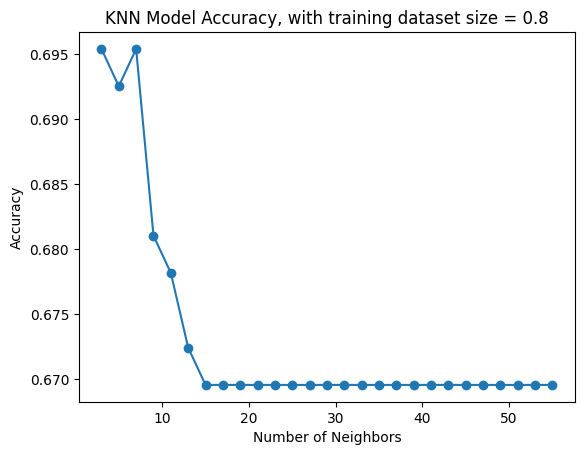

Accuracy for 3 neighbors:
Accuracy: 0.6709183673469388


Accuracy for 5 neighbors:
Accuracy: 0.6607142857142857


Accuracy for 7 neighbors:
Accuracy: 0.6556122448979592


Accuracy for 9 neighbors:
Accuracy: 0.6556122448979592


Accuracy for 11 neighbors:
Accuracy: 0.6556122448979592


Accuracy for 13 neighbors:
Accuracy: 0.6556122448979592


Accuracy for 15 neighbors:
Accuracy: 0.6556122448979592


Accuracy for 17 neighbors:
Accuracy: 0.6556122448979592


Accuracy for 19 neighbors:
Accuracy: 0.6556122448979592


Accuracy for 21 neighbors:
Accuracy: 0.6556122448979592


Accuracy for 23 neighbors:
Accuracy: 0.6556122448979592


Accuracy for 25 neighbors:
Accuracy: 0.6556122448979592


Accuracy for 27 neighbors:
Accuracy: 0.6556122448979592


Accuracy for 29 neighbors:
Accuracy: 0.6556122448979592


Accuracy for 31 neighbors:
Accuracy: 0.6556122448979592


Accuracy for 33 neighbors:
Accuracy: 0.6556122448979592


Accuracy for 35 neighbors:
Accuracy: 0.6556122448979592


Accuracy for 37 ne

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 43, n_neighbors = 45

In [11]:
number_of_neighbors = 55
training_size = [x / 100 for x in range(10, 100, 10)]
print(training_size)
for j in training_size:
    accuracy_scores = []
    neighbour_values = []
    for i in range(3, number_of_neighbors+1, 2):
        print(f"Accuracy for {i} neighbors:")
        accuracy = KNN(neighbors=i, test_size=j)
        print("\n")
        accuracy_scores.append(accuracy)
        neighbour_values.append(i)


    print(accuracy_scores)
    plt.plot(neighbour_values, accuracy_scores, marker='o')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.title('KNN Model Accuracy, with training dataset size = ' + str(j))
    plt.show()